<a href="https://colab.research.google.com/github/MatheusrCunha/sistemas_de_controle_1/blob/main/Identifica%C3%A7%C3%A3o_de_Sistemas_de_2_ordem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Sistemas de Controle 1
# Jonas Morsch

################## Check if control libary is on this runtime ##################
try:
    import control as clt
except:
    %pip install control
    import control as clt
    from google.colab import output
    output.clear() # erase collab console
################################################################################

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
# Make gaph resolution to match the dpi of the PDF
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
import matplotlib.cm as cm
import numpy as np
from numpy import pi, e, log, sqrt
import scipy
from scipy import signal


# Declare 's' as a symbol in control library to write the transfer function
s = clt.TransferFunction.s

# Funções de conversão:

# Utilizando os valores de tempo de pico, overshoot e ganho
# para gerar a função de transferência
def tog_to_tf(t_p,OS,dcgain):

    # Valores medidos á partir do gráfico
    # Ganho DC
    print("Ganho DC:",dcgain)
    # Tempo de Pico
    print("Tempo de Pico:",t_p)
    # Overshoot
    print("Overshoot:",OS*100,"%")

    zeta = -log(OS)/sqrt(pi**2 + log(OS)**2)
    print("Valor de ζ:",zeta)
    omega_n = pi/(t_p * sqrt(1-zeta**2))
    print("Valor de ω",omega_n)

    return dcgain*omega_n**2/ (s**2 + 2*zeta*omega_n*s + omega_n**2)

# Utilizando uma função de tranferência conhecida
# para extrair a omega, zeta e ganho
def tf_to_ozg(G):

    # Ganho DC
    dcgain = clt.dcgain(G)
    print("Ganho DC:",dcgain)
    # Tempo de Pico
    t_p = T[np.argmax(y)]
    print("Tempo de Pico:",t_p)
    # Overshoot
    OS = (max(y) -  clt.dcgain(G)) / clt.dcgain(G)
    print("Overshoot:",OS*100,"%")

    zeta = -log(OS)/sqrt(pi**2 + log(OS)**2)
    print("Valor de ζ:",zeta)
    omega_n = pi/(t_p * sqrt(1-zeta**2))
    print("Valor de ω",omega_n)

    return omega_n, zeta, dcgain

# Utilizando os valores de tempo de pico, overshoot e ganho
# para extrair a omega, zeta e ganho
def tog_to_ozg(t_p,OS,dcgain):

    # Valores medidos á partir do gráfico
    # Ganho DC
    print("Ganho DC:",dcgain)
    # Tempo de Pico
    print("Tempo de Pico:",t_p)
    # Overshoot
    print("Overshoot:",OS*100,"%")

    zeta = -log(OS)/sqrt(pi**2 + log(OS)**2)
    print("Valor de ζ:",zeta)
    omega_n = pi/(t_p * sqrt(1-zeta**2))
    print("Valor de ω",omega_n)

    return omega_n, zeta, dcgain

Questão a: 

Ganho DC: 1.0
Tempo de Pico: 2.0
Overshoot: 25.0 %
Valor de ζ: 0.4037127519434207
Valor de ω 1.7169315985765248


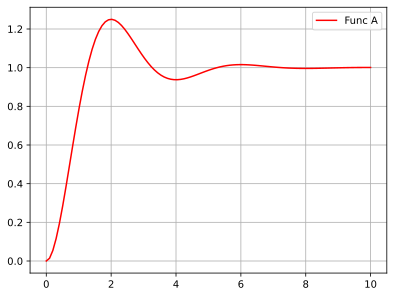


        2.948
---------------------
s^2 + 1.386 s + 2.948



In [ ]:
print("Questão a: \n")

# entrada: tempo de pico, overshoot e ganho dc
omega_n, zeta, dcgain = tog_to_ozg(2.0, 0.25, 1.0)

# Função reconstruída
Ga_r = dcgain*omega_n**2/ (s**2 + 2*zeta*omega_n*s + omega_n**2)

# Gráfico
T, y = clt.step_response(Ga_r, T = 10)
plt.plot(T, y, 'r', label='Func A')
plt.legend()
plt.grid()
plt.show()

# Função reconstruída
print(Ga_r)

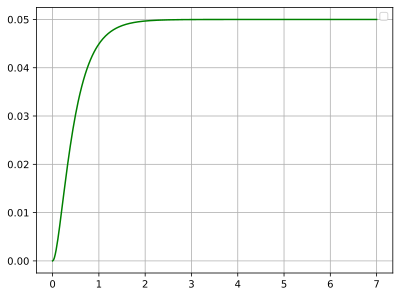

Ganho DC: 0.05
Tempo de Pico: 7.0
Overshoot: -6.404195368459042e-07 %
Valor de ζ: nan
Valor de ω nan


<ipython-input-11-830f141baf03>:63: RuntimeWarning: invalid value encountered in log
  zeta = -log(OS)/sqrt(pi**2 + log(OS)**2)


In [ ]:
G = 1 / (s**2 + 10*s + 20)

# Gráfico
T, y = clt.step_response(G, T = 7)
plt.plot(T, y, 'g')
plt.legend()
plt.grid()
plt.show()

omega_n, zeta, dcgain = tf_to_ozg(G)

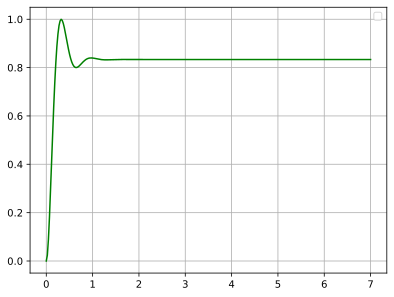

In [7]:
kp = 100
G = kp / (s**2 + 10*s + 20 + kp)

# Gráfico
T, y = clt.step_response(G, T = 7)
plt.plot(T, y, 'g')
plt.legend()
plt.grid()
plt.show()

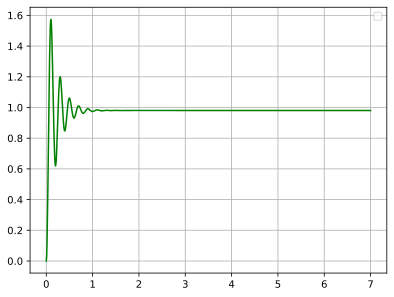

Ganho DC: 0.9803921568627451
Tempo de Pico: 0.10224719101123596
Overshoot: 60.56000305986875 %
Valor de ζ: 0.15764744503178127
Valor de ω 31.11453962436758


In [ ]:
G = 1000 / (s**2 + 10*s + 1020)

# Gráfico
T, y = clt.step_response(G, T = 7)
plt.plot(T, y, 'g')
plt.legend()
plt.grid()
plt.show()

omega_n, zeta, dcgain = tf_to_ozg(G)

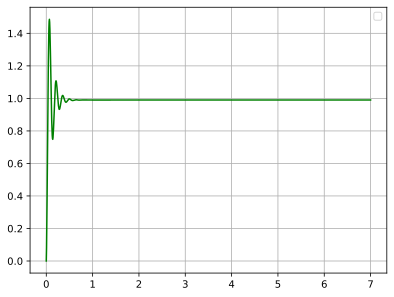

Ganho DC: 0.9900990099009901
Tempo de Pico: 0.0670926517571885
Overshoot: 50.11003366817028 %
Valor de ζ: 0.21480204417538534
Valor de ω 47.94381383552577


In [ ]:
kp = 2000
kd = 10
G = (kp+kd*s) / (s**2 + 10*s + 20 + (kp + kd*s))

# Gráfico
T, y = clt.step_response(G, T = 7)
plt.plot(T, y, 'g')
plt.legend()
plt.grid()
plt.show()

omega_n, zeta, dcgain = tf_to_ozg(G)

Método do ganho crítico

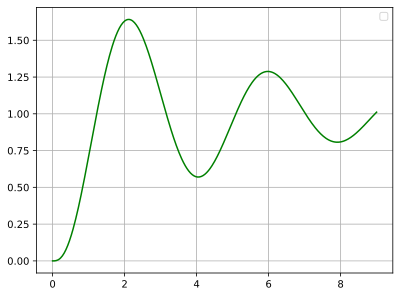


           13.5 s^2 + 2.34 s
---------------------------------------
s^5 + 6 s^4 + 5 s^3 + 13.5 s^2 + 2.34 s



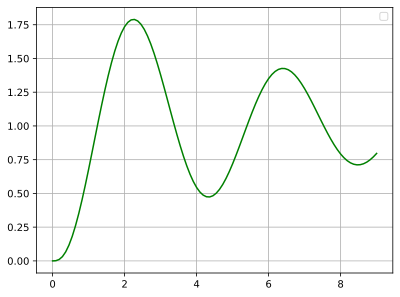

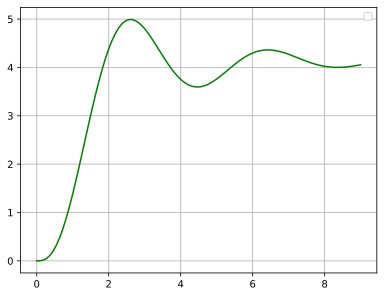

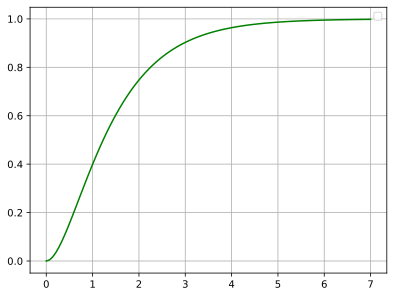

In [ ]:
kp = 15
G = (kp) / (s**3 + 6*s**2 + 5*s + kp)

# Gráfico
T, y = clt.step_response(G, T = 9)
plt.plot(T, y, 'g')
plt.legend()
plt.grid()
plt.show()

kp = 13.5
ki = 2.34
G = (kp + ki/s) / (s**3 + 6*s**2 + 5*s + (kp + ki/s))
print(G)

# Gráfico
Ti, yi = clt.step_response(G, T = 9)
plt.plot(Ti, yi, 'g')
plt.legend()
plt.grid()
plt.show()

#Malha Fechada
G3 = (6.3223**2 + 18*s + 12.811) / (s**4 + 6*s**3 + 11.3223*s**2 + 18*s + 12.811)

# Gráfico
Ti, yi = clt.step_response(G3, T = 9)
plt.plot(Ti, yi, 'g')
plt.legend()
plt.grid()
plt.show()


G = 2 / (s**2 + 3*s + 2)

# Gráfico
T, y = clt.step_response(G, T = 7)
plt.plot(T, y, 'g')
plt.legend()
plt.grid()
plt.show()


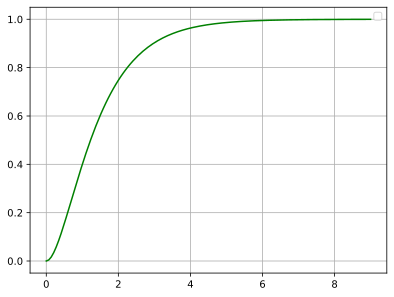

In [ ]:
#Questão 1:
G = 2 / (s**2 + 3*s + 2)

# Gráfico
T, y = clt.step_response(G, T = 9)
plt.plot(T, y, 'g')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import control as ctrl

# Função que representa o sistema dinâmico
def system_dynamics(Kp, Ki, Kd):
    num = [Kd, Kp, Ki]
    den = [1, 3, 2]
    system = ctrl.TransferFunction(num, den)
    return system

# Função para obter a resposta ao degrau do sistema
def step_response(Kp, Ki, Kd):
    system = system_dynamics(Kp, Ki, Kd)
    time, response = ctrl.step_response(system)
    return time, response

# Função para encontrar os picos na resposta ao degrau
def find_peak_indices(response):
    peaks, _ = find_peaks(response)
    return peaks

# Função para calcular os parâmetros do controlador PID pelo método de Ziegler-Nichols
def calculate_pid_parameters(time, response):
    peaks = find_peak_indices(response)
    peak_time = time[peaks[1]] - time[peaks[0]]
    Ku = 4 / (np.pi * peak_time)
    Tu = peak_time
    Kp = 0.6 * Ku
    Ki = 2 * Kp / Tu
    Kd = Kp * Tu / 8
    return Kp, Ki, Kd

# Função para plotar a resposta ao degrau com os parâmetros PID calculados
def plot_step_response_with_pid_parameters(Kp, Ki, Kd):
    system = system_dynamics(Kp, Ki, Kd)
    time, response = step_response(Kp, Ki, Kd)

    plt.plot(time, response)
    plt.title('Resposta ao Degrau com Parâmetros PID')
    plt.xlabel('Tempo')
    plt.ylabel('Resposta')
    plt.grid(True)
    plt.show()

# Calcula os parâmetros PID usando o método de Ziegler-Nichols
Kp, Ki, Kd = calculate_pid_parameters(*step_response(0.5, 0.1, 0.1))

# Plota a resposta ao degrau com os parâmetros PID calculados
plot_step_response_with_pid_parameters(Kp, Ki, Kd)

# Exibe os parâmetros PID calculados
print("Parâmetros PID Calculados:")
print("Kp:", Kp)
print("Ki:", Ki)
print("Kd:", Kd)


Questão c: 

Ganho DC: 0.25
Tempo de Pico: 2.5
Overshoot: 10.0 %
Valor de ζ: 0.5911550337988976
Valor de ω 1.558024519014653


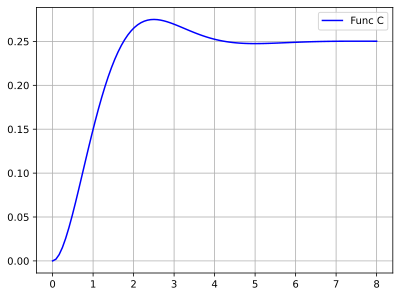


       0.6069
---------------------
s^2 + 1.842 s + 2.427



In [ ]:
print("Questão c: \n")

# entrada: tempo de pico, overshoot e ganho dc
Gc_r = tog_to_tf(2.5, 0.1, 0.25)

# Gráfico
T, y = clt.step_response(Gc_r, T = 8)
plt.plot(T, y, 'b', label='Func C')
plt.legend()
plt.grid()
plt.show()

# Função reconstruída
print(Gc_r)

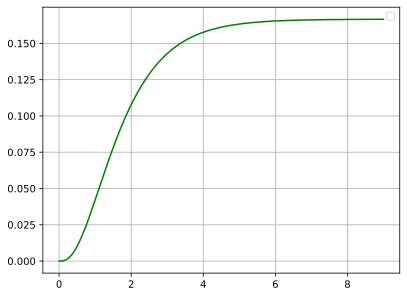

In [5]:
#Questão 3
G = 1 / ((s+1)*(s+2)*(s+3))

# Gráfico
T, y = clt.step_response(G, T = 9)
plt.plot(T, y, 'g')
plt.legend()
plt.grid()
plt.show()


In [ ]:
!rm -rf makepdf.py
!wget https://raw.githubusercontent.com/JonasGMorsch/ColabMakePDF/master/makepdf.py
import makepdf; makepdf.start()

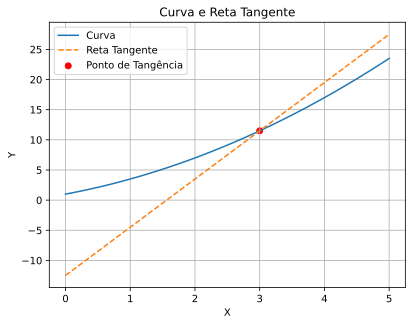

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Defina a função da curva
def curve_function(x):
    return 1 / ((s+1)*(s+2)*(s+3))

# Calcule a derivada da função (a inclinação da tangente)
def derivative_function(x):
    return 2 * x + 2

# Ponto onde a tangente será traçada
x_point = 3

# Calcule o valor da função e da derivada no ponto
y_point = curve_function(x_point)
slope = derivative_function(x_point)

# Defina a equação da reta tangente
def tangent_line(x):
    return slope * (x - x_point) + y_point

# Gere dados para plotagem
x_values = np.linspace(0, 5, 100)
y_values_curve = curve_function(x_values)
y_values_tangent = tangent_line(x_values)

# Plotar a curva e a reta tangente
plt.plot(x_values, y_values_curve, label='Curva')
plt.plot(x_values, y_values_tangent, label='Reta Tangente', linestyle='--')
plt.scatter(x_point, y_point, color='red', marker='o', label='Ponto de Tangência')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curva e Reta Tangente')
plt.grid(True)
plt.show()

